In [9]:
from tools import *
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import random
path_listing(path = r'C:\Users\cjang.WILDCAT\Desktop\EIS_Manager\data\\')[25:28]

['DE_49_7_30.mpt', 'DE_49_8_30.mpt', 'DE_49_9_30.mpt']

No handles with labels found to put in legend.
THE LOWEST ERROR IS  49.11746984171598


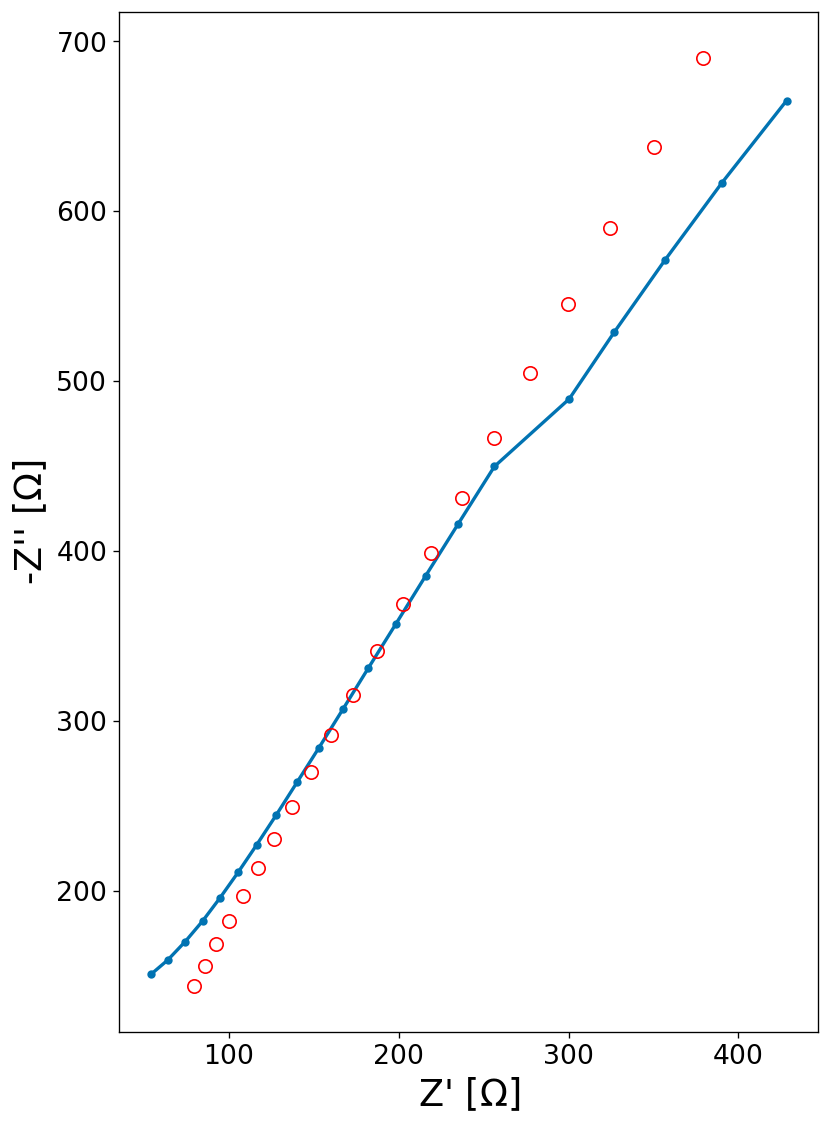

No handles with labels found to put in legend.
THE LOWEST ERROR IS  103.67905552124287


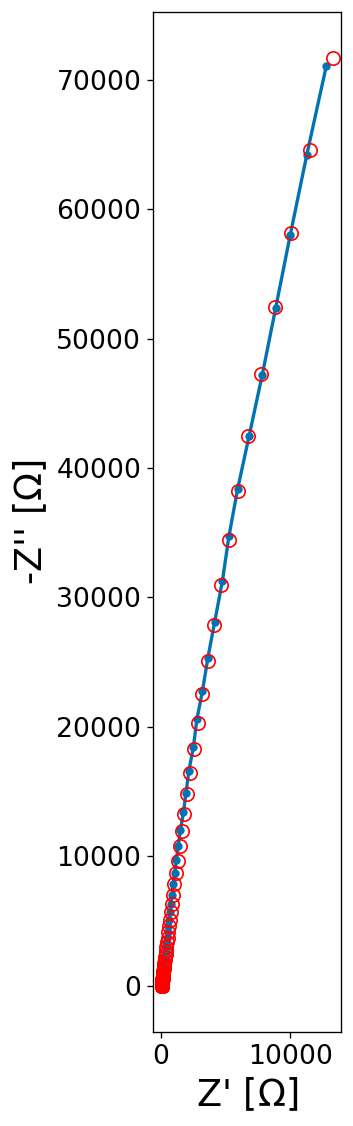

No handles with labels found to put in legend.
THE LOWEST ERROR IS  4751.843184754167


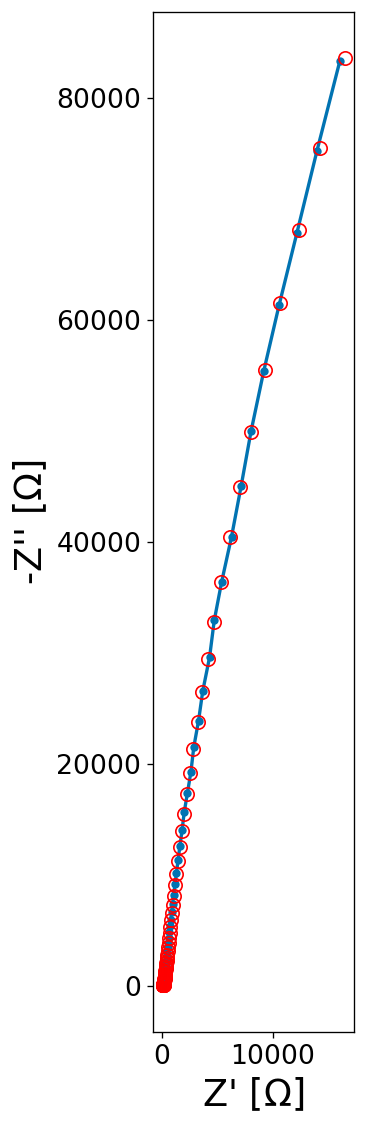

KeyboardInterrupt: 

In [16]:
for i in path_listing(path = r'C:\Users\cjang.WILDCAT\Desktop\EIS_Manager\data\\')[25:28]:
    mpt = mpt_data(path = r'C:\Users\cjang.WILDCAT\Desktop\EIS_Manager\data\\', data = [i])
    init_guesses = []
    param_list = []
    for i in range(100):
        self = mpt
        Rs_guess = min(self.df[0]['re'])
        R1_guess = max(self.df[0]['re'])//4
        n1_guess = random.uniform(0, 1)
        q1_guess = random.uniform(0, .1)
        R2_guess = 2*max(self.df[0]['re'])//4
        n2_guess = random.uniform(0, 1)
        q2_guess = random.uniform(0, .1)
        Q3_guess = random.uniform(0, .1)
        n3_guess = random.uniform(0, 1)
        params = Parameters()
        params.add('Rs', value=Rs_guess, min=Rs_guess*.001, max=Rs_guess*100)
        params.add('R1', value=R1_guess, min=R1_guess*.001, max=R1_guess*100)
        params.add('n1', value=n1_guess, min=0, max=1)
        #params.add('fs1', value=fs1_guess, min=10**-2, max=10**10)
        params.add('Q1', value=q1_guess, min=0, max=.2)
        params.add('R2', value=R2_guess, min=R2_guess*.001, max=R2_guess*100)
        params.add('n2', value=n2_guess, min=.01, max=1)
        #params.add('fs2', value=fs2_guess, min=fs2_guess**.1, max=10**10)
        params.add('Q2', value=q2_guess, min=0, max=.4)
        params.add('Q', value=Q3_guess, min=0, max=.5)
        params.add('n', value=n3_guess, min=.01, max=1)
        param_list.append(params)
        self.mpt_fit(params, circuit = 'R-RQ-RQ-Q', maxfev = 1000)
        init_guesses.append(mpt.low_error)
    params = param_list[init_guesses.index(min(init_guesses))]
    self.mpt_fit(params, circuit = 'R-RQ-RQ-Q',maxfev = 500000000)
    print("THE LOWEST ERROR IS ", mpt.low_error)
    mpt.width = 500
    mpt.height = 25
    mpt.mpt_plot(fitting = 'on')

In [82]:
import random
def new_guesser(mpt):
    init_guesses = []
    param_list = []
    for i in range(100):
        self = mpt
        Rs_guess = min(self.df[0]['re'])
        R1_guess = max(self.df[0]['re'])//4
        n1_guess = random.uniform(0, 1)
        q1_guess = random.uniform(0, .1)
        R2_guess = 2*max(self.df[0]['re'])//4
        n2_guess = random.uniform(0, 1)
        q2_guess = random.uniform(0, .1)
        Q3_guess = random.uniform(0, .1)
        n3_guess = random.uniform(0, 1)
        params = Parameters()
        params.add('Rs', value=Rs_guess, min=Rs_guess*.001, max=Rs_guess*100)

        params.add('R1', value=R1_guess, min=R1_guess*.001, max=R1_guess*100)
        params.add('n1', value=n1_guess, min=0, max=1)
        #params.add('fs1', value=fs1_guess, min=10**-2, max=10**10)
        params.add('Q1', value=q1_guess, min=0, max=.2)

        params.add('R2', value=R2_guess, min=R2_guess*.001, max=R2_guess*100)
        params.add('n2', value=n2_guess, min=.01, max=1)
        #params.add('fs2', value=fs2_guess, min=fs2_guess**.1, max=10**10)
        params.add('Q2', value=q2_guess, min=0, max=.4)

        params.add('Q', value=Q3_guess, min=0, max=.5)
        params.add('n', value=n3_guess, min=.01, max=1)
        param_list.append(params)
        #params.pretty_print()
        self.mpt_fit(params, circuit = 'R-RQ-RQ-Q', maxfev = 5000)
        
        #print(mpt.low_error)
        init_guesses.append(mpt.low_error)
    #print("THE MINIMUM IS ...." ,min(init_guesses))
    #print("WITH VALUES OF ", param_list[init_guesses.index(min(init_guesses))].pretty_print())
    params = param_list[init_guesses.index(min(init_guesses))]
    self.mpt_fit(params, circuit = 'R-RQ-RQ-Q',maxfev = 500000000)
    print("THE LOWEST ERROR IS ", mpt.low_error)
    mpt.width = 50
    mpt.height = 25
    mpt.mpt_plot(fitting = 'on')

In [3]:
mpt.guesser(circuit = 'R-RQ-Q')

,file,fit_Rs,fit_R1,fit_n1,fit_fs1,fit_Q1,fit_Q,fit_n2
0,DE_104_1_30_trimmed.mpt,181.314956,6597.988141,0.749495,31151.715589,1.638755e-08,4.055879e-07,0.730068


No handles with labels found to put in legend.


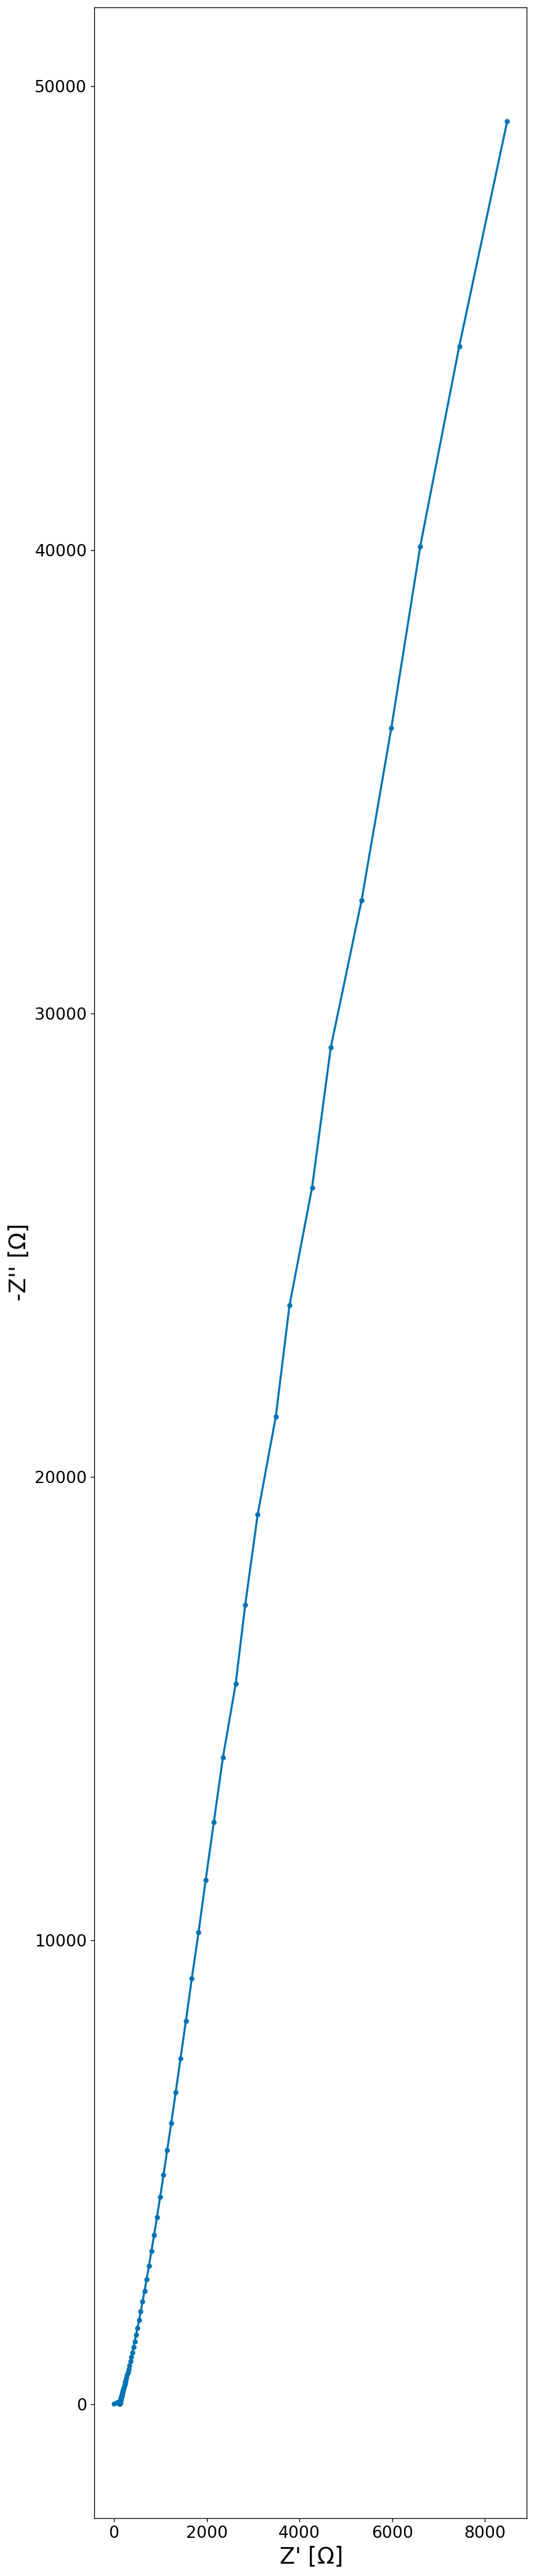

In [22]:
mpt.width = 500
mpt.height = 100
mpt.mpt_plot()

In [25]:
mpt.df_raw.head()

,f,re,im,Z_mag,Z_phase,times,E_avg,I_avg,Cs/µF,Cp/µF,cycle_number,I Range,|Ewe|/V,|I|/A,(Q-Qo)/mA.h,Analog IN 1/V,Y_re,Y_im,Y_mag,Y_phase,dq/mA.h,Unnamed: 21,w
0,1000018.60,328.734100,454.916410,561.262020,-54.147171,1.607492,-0.000910,0.000019,0.000350,0.000230,1.0,12,0.000628,0.000001,-4.540541e-09,0.000425,0.001044,0.001444,0.001782,54.147171,-4.540541e-09,NaN,6.283302e+06
1,891246.69,-4.140771,13.204187,13.838228,-107.411180,2.622600,-0.001409,-0.012680,0.013524,0.012313,1.0,9,0.000059,0.000004,-1.749967e-06,0.001066,-0.021623,0.068953,0.072264,107.411180,-1.745426e-06,NaN,5.599868e+06
2,794332.69,390.277950,523.672730,653.107970,-53.303917,4.101484,-0.001784,0.000011,0.000383,0.000246,1.0,12,0.001122,0.000002,-3.754701e-06,0.000585,0.000915,0.001228,0.001531,53.303917,-2.004734e-06,NaN,4.990939e+06
3,707949.81,417.907010,565.725160,703.342900,-53.546337,4.696477,-0.001941,0.000016,0.000397,0.000257,1.0,12,0.002918,0.000004,-3.727839e-06,0.000666,0.000845,0.001144,0.001422,53.546337,2.686166e-08,NaN,4.448180e+06
4,630956.81,449.914950,618.398680,764.748600,-53.962299,5.292477,-0.002067,0.000007,0.000408,0.000267,1.0,12,0.005477,0.000007,-3.718076e-06,0.000746,0.000769,0.001057,0.001308,53.962299,9.763226e-09,NaN,3.964419e+06
